In [1]:
import pandas as pd
from collections import Counter

### Read dataset

In [2]:
df = pd.read_json('../abstract_scraper/dataset_2022-09-14 21:23:59.588839.json')
df.head(2)

,id,primary_category,title,authors,published,abstract,pdf_url
0,http://arxiv.org/abs/2209.06203v1,cs.LG,Normalizing Flows for Interventional Density E...,"[Valentyn Melnychuk, Dennis Frauen, Stefan Feu...",1663091773,Existing machine learning methods for causal i...,http://arxiv.org/pdf/2209.06203v1
1,http://arxiv.org/abs/2209.06192v1,cs.CV,StoryDALL-E: Adapting Pretrained Text-to-Image...,"[Adyasha Maharana, Darryl Hannan, Mohit Bansal]",1663091259,Recent advances in text-to-image synthesis hav...,http://arxiv.org/pdf/2209.06192v1


### Check for duplicates

In [3]:
print(f'All rows: {df.shape[0]}')
print(f'Distinct abstracts: {df.abstract.nunique()}')

All rows: 1727509
Distinct abstracts: 1726441


In [4]:
df.abstract.value_counts()[df.abstract.value_counts() > 1]

This paper has been withdrawn.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

#### Drop duplicates

In [5]:
df = df.drop_duplicates(subset=['abstract'], keep='first')
print(f'All rows: {df.shape[0]}')
print(f'Distinct abstracts: {df.abstract.nunique()}')

All rows: 1726441
Distinct abstracts: 1726441


#### Remove abstracts for withdrawn papers

In [6]:
pattern = r"(paper has been withdrawn)|(withdrawn due to)"
df = df[~df.abstract.str.contains(pattern, case=False, regex=True)]
print(f'All rows: {df.shape[0]}')
print(f'Distinct abstracts: {df.abstract.nunique()}')

/var/folders/rm/mnpcbkb172z3w2vntl7yjgjw0000gn/T/ipykernel_44577/1433976102.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[~df.abstract.str.contains(pattern, case=False, regex=True)]


All rows: 1725868
Distinct abstracts: 1725868


### Abstract length distribution

In [7]:
# space-splitted tokens
df['abstract_len'] = df.abstract.apply(lambda x: len(x.split()))
df.head(2)

,id,primary_category,title,authors,published,abstract,pdf_url,abstract_len
0,http://arxiv.org/abs/2209.06203v1,cs.LG,Normalizing Flows for Interventional Density E...,"[Valentyn Melnychuk, Dennis Frauen, Stefan Feu...",1663091773,Existing machine learning methods for causal i...,http://arxiv.org/pdf/2209.06203v1,183
1,http://arxiv.org/abs/2209.06192v1,cs.CV,StoryDALL-E: Adapting Pretrained Text-to-Image...,"[Adyasha Maharana, Darryl Hannan, Mohit Bansal]",1663091259,Recent advances in text-to-image synthesis hav...,http://arxiv.org/pdf/2209.06192v1,260


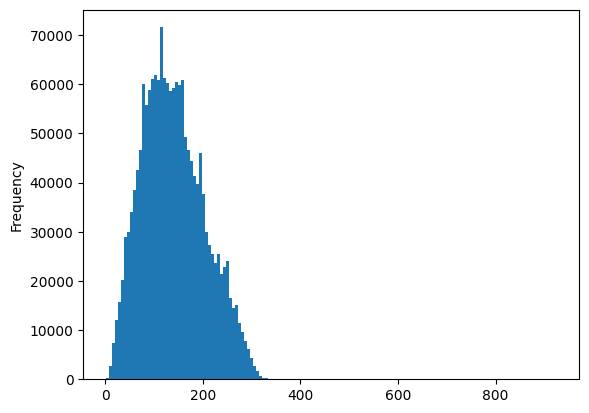

In [8]:
df.abstract_len.plot(kind='hist', bins=150);

In [9]:
df.abstract_len.describe()

count    1.725868e+06
mean     1.397040e+02
std      6.383279e+01
min      1.000000e+00
25%      9.100000e+01
50%      1.340000e+02
75%      1.830000e+02
max      9.250000e+02
Name: abstract_len, dtype: float64

In [10]:
df.abstract_len.nlargest(10)

1169727    925
1076850    760
1694575    655
1616494    617
452998     587
875011     584
493957     575
173002     567
46192      558
1608521    555
Name: abstract_len, dtype: int64

In [11]:
df.abstract_len.quantile(0.9999)

370.0

#### 99.99% of all the abstracts have length smaller than or equal 370 space splitted tokens. Most of the popular models could process a whole abstract.

### Abstract chars distribution (on a sample)

In [12]:
c = Counter()
for _, row in df.sample(1000, random_state=42).iterrows():
    abstract = row.abstract.lower()
    for char in abstract:
        if c.get(char):
            c[char] += 1
        else:
            c[char] = 1

In [13]:
c.most_common(50)

[(' ', 126500),
 ('e', 91400),
 ('t', 70536),
 ('i', 62009),
 ('a', 61362),
 ('o', 56382),
 ('n', 55746),
 ('s', 51589),
 ('r', 48967),
 ('l', 32426),
 ('c', 30112),
 ('h', 28952),
 ('d', 26329),
 ('m', 22097),
 ('u', 20499),
 ('p', 20211),
 ('f', 18194),
 ('g', 14726),
 ('\n', 11856),
 ('b', 10759),
 ('y', 10754),
 ('w', 10019),
 ('v', 8801),
 ('.', 6467),
 (',', 5790),
 ('-', 4461),
 ('$', 4017),
 ('x', 3147),
 ('k', 3107),
 ('\\', 2409),
 ('q', 1865),
 (')', 1696),
 ('(', 1674),
 ('z', 1385),
 ('{', 1268),
 ('}', 1268),
 ('0', 1181),
 ('1', 1111),
 ('2', 1017),
 ('_', 862),
 ('^', 684),
 ('j', 641),
 ('3', 517),
 ('5', 368),
 ("'", 350),
 ('4', 342),
 ('=', 299),
 ('/', 291),
 ('6', 276),
 ('9', 243)]

In [14]:
def show_abstract_contained_char(char: str) -> None:
    dff = df[df.abstract.str.contains(char, case=False, regex=False)].head(3)
    for _, row in dff.iterrows():
        print("-"*50)
        print(row.abstract)


In [15]:
show_abstract_contained_char('https')

--------------------------------------------------
Ever since the Multilayered Perceptron was first introduced the connectionist
community has struggled with the concept of uncertainty and how this could be
represented in these types of models. This past decade has seen a lot of effort
in trying to join the principled approach of probabilistic modeling with the
scalable nature of deep neural networks. While the theoretical benefits of this
consolidation are clear, there are also several important practical aspects of
these endeavors; namely to force the models we create to represent, learn, and
report uncertainty in every prediction that is made. Many of these efforts have
been based on extending existing frameworks with additional structures. We
present Borch, a scalable deep universal probabilistic programming language,
built on top of PyTorch. The code is available for download and use in our
repository https://gitlab.com/desupervised/borch.
-----------------------------------------

Remarks:
* new lines
* latex equations and variables
* urls
* \\\\ - escapes
